In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [16]:
# 提取样本数据
feature = []
target = []
for i in range(10):
    for j in range(1, 501):
        img = plt.imread(f'./data/{i}/{i}_{j}.bmp')
        feature.append(img)
        target.append(i)

In [30]:
feature.shape

(5000, 28, 28)

In [33]:
feature = feature.reshape((5000, 784))
feature.shape

(5000, 784)

In [34]:
# 切分训练数据和测试数据
feature = np.array(feature)
target = np.array(target)
feature.shape
# 将样本数据进行打乱
np.random.seed(10)
np.random.shuffle(feature)
np.random.seed(10)
np.random.shuffle(target)
x_train = feature[:4980]
y_train = target[:4980]
x_test = feature[4980:]
y_test = target[4980:]

In [37]:
# 构建训练模型
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
print('模型分类的结果：',knn.predict(x_test))
print('真实的分类结果：',y_test)

模型分类的结果： [0 7 1 1 9 6 7 1 0 6 5 3 1 5 6 7 0 7 3 9]
真实的分类结果： [0 7 7 1 9 6 7 1 0 8 5 3 1 5 6 7 0 7 3 9]


In [39]:
knn.score(x_train, y_train)

0.9614457831325302

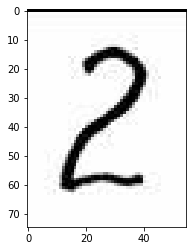

In [45]:
img = plt.imread('./数字.jpg')
plt.imshow(img)
img_two = img[0:75,130:185,:]
plt.imshow(img_two)

In [53]:
img_two.shape

(75, 55)

In [52]:
img_two = img_two.mean(axis=2)
img_two.shape

IndexError: tuple index out of range

In [55]:
import scipy.ndimage as ndimage
img_two = ndimage.zoom(img_two, zoom=(28/75, 28/55))

/Applications/anaconda3/lib/python3.7/site-packages/scipy/ndimage/interpolation.py:611: UserWarning: From scipy 0.13.0, the output shape of zoom() is calculated with round() instead of int() - for these inputs the size of the returned array has changed.
  "the returned array has changed.", UserWarning)


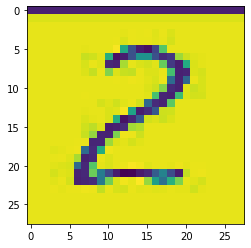

In [56]:
plt.imshow(img_two)

In [57]:
img_two = img_two.reshape((1, -1))
knn.predict(img_two)

array([3])